In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import seaborn as sns
from scipy.sparse import csr_matrix
import random
random.seed(2021)

In [13]:
adata = sc.read_h5ad('../data/harmony.batchind.h5ad')

Which cell types are present?

... storing 'orig.ident' as categorical
... storing 'individual' as categorical
... storing 'SampleID' as categorical
... storing 'Batch' as categorical


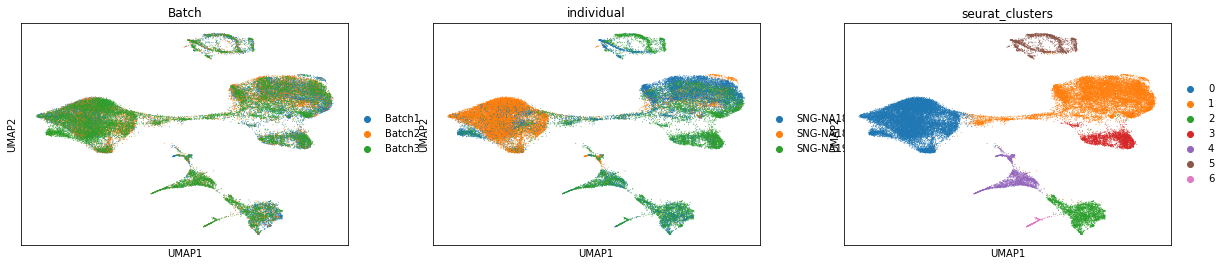

In [34]:
adata.obs['seurat_clusters'] = pd.Categorical(adata.obs['seurat_clusters'])
sc.pl.umap(adata, color=['Batch', 'individual', 'seurat_clusters'])

In [35]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=100, use_rep="X_harmony")
sc.tl.paga(adata, groups='seurat_clusters')

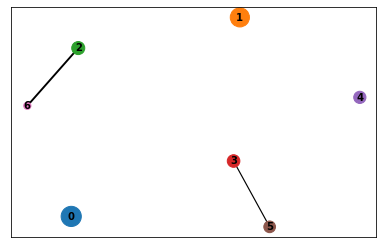

In [36]:
sc.pl.paga(adata, color=['seurat_clusters'], threshold=.1)

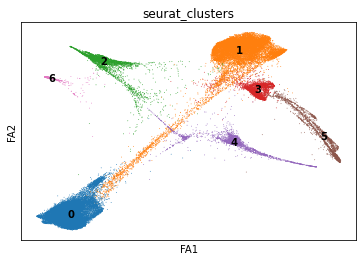

In [37]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['seurat_clusters'], legend_loc='on data')

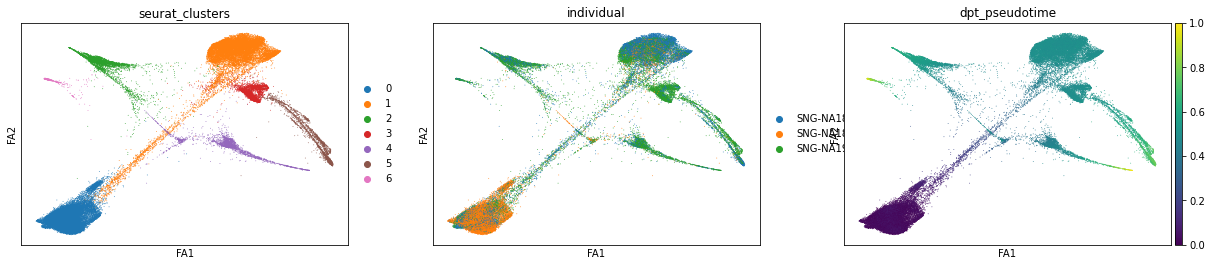

In [38]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['seurat_clusters']  == 0)[2]
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color=['seurat_clusters','individual','dpt_pseudotime'])

The raw data slots now contain log-normalized, SCTransform-corrected counts

In [39]:
adata = adata.raw.to_adata()

Subset to the cells from each lineage

In [40]:
endo = adata[adata.obs['seurat_clusters'].isin([0, 2, 6])]
neur = adata[adata.obs['seurat_clusters'].isin([0, 1, 3, 5])]
hep = adata[adata.obs['seurat_clusters'].isin([0, 4])]

For downstream analysis, we can subset to the top 5000 highly variable genes. After doing so, we're going to revert our logarithmized data back to SCTransform-corrected counts data

In [41]:
sc.pp.highly_variable_genes(endo, n_top_genes=5000)
endo = endo[:, endo.var.highly_variable]
endo.X = endo.X.expm1()

sc.pp.highly_variable_genes(hep, n_top_genes=5000)
hep = hep[:, hep.var.highly_variable]
hep.X = hep.X.expm1()

sc.pp.highly_variable_genes(neur, n_top_genes=5000)
neur = neur[:, neur.var.highly_variable]
neur.X = neur.X.expm1()

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


For downstream analysis, we would like pseudotime within each of these objects to go from 0 to 1; right now, some of them have a max pseudotime value less than 1

In [42]:
endo.obs['dpt_pseudotime'] = endo.obs['dpt_pseudotime']/max(endo.obs['dpt_pseudotime'])
neur.obs['dpt_pseudotime'] = neur.obs['dpt_pseudotime']/max(neur.obs['dpt_pseudotime'])
hep.obs['dpt_pseudotime'] = hep.obs['dpt_pseudotime']/max(hep.obs['dpt_pseudotime'])

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [43]:
endo.write_h5ad("../data/endo.dpt.h5ad")
neur.write_h5ad("../data/neur.dpt.h5ad")
hep.write_h5ad("../data/hep.dpt.h5ad")

## High resolution trajectory inference

... storing 'orig.ident' as categorical
... storing 'individual' as categorical
... storing 'SampleID' as categorical
... storing 'Batch' as categorical


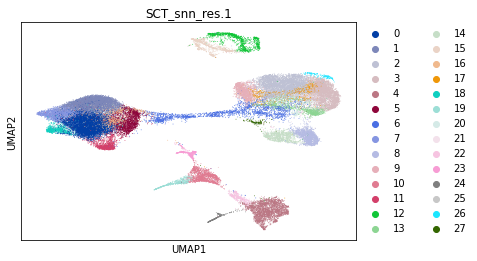

In [14]:
adata.obs['SCT_snn_res.1'] = pd.Categorical(adata.obs['SCT_snn_res.1'])
sc.pl.umap(adata, color=['SCT_snn_res.1'])

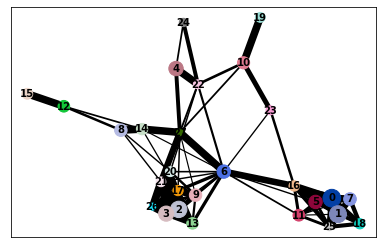

In [15]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=100, use_rep="X_harmony")
sc.tl.paga(adata, groups='SCT_snn_res.1')
sc.pl.paga(adata, color=['SCT_snn_res.1'], threshold=.145)

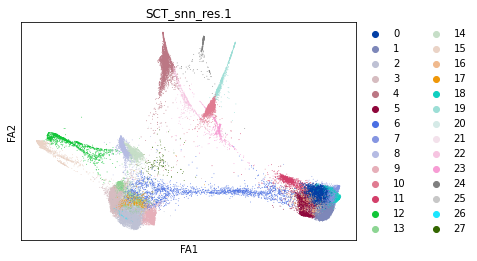

In [16]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['SCT_snn_res.1'])

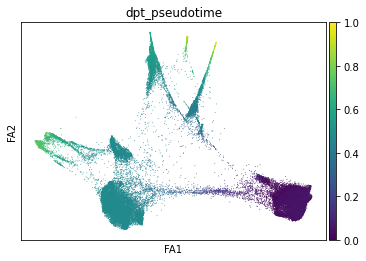

In [18]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['SCT_snn_res.1']  == 1)[2]
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color=['dpt_pseudotime'])

In [26]:
adata = adata.raw.to_adata()

In [27]:
endo = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 22, 4, 24])]
neur = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 2, 3, 9, 13, 
                                              17, 20, 21, 26, 27, 14, 8, 12, 15])]
hep = adata[adata.obs['SCT_snn_res.1'].isin([0, 1, 5, 7, 11, 16, 18, 25, 6, 22, 10, 19])]

In [28]:
sc.pp.highly_variable_genes(endo, n_top_genes=5000)
endo = endo[:, endo.var.highly_variable]
endo.X = endo.X.expm1()

sc.pp.highly_variable_genes(hep, n_top_genes=5000)
hep = hep[:, hep.var.highly_variable]
hep.X = hep.X.expm1()

sc.pp.highly_variable_genes(neur, n_top_genes=5000)
neur = neur[:, neur.var.highly_variable]
neur.X = neur.X.expm1()

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [29]:
endo.obs['dpt_pseudotime'] = endo.obs['dpt_pseudotime']/max(endo.obs['dpt_pseudotime'])
neur.obs['dpt_pseudotime'] = neur.obs['dpt_pseudotime']/max(neur.obs['dpt_pseudotime'])
hep.obs['dpt_pseudotime'] = hep.obs['dpt_pseudotime']/max(hep.obs['dpt_pseudotime'])

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [30]:
endo.write_h5ad("../data/endo.dpt.hires.h5ad")
neur.write_h5ad("../data/neur.dpt.hires.h5ad")
hep.write_h5ad("../data/hep.dpt.hires.h5ad")